In [ ]:
# change into root directory to the project
import os
os.chdir('..')

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob

from neurolib.models import hopf

import neurolib.utils.loadData as ld
import neurolib.utils.functions as func
import neurolib.utils.fitparams as fp

# Single node simulation

In [44]:
hopfModel = hopf.HopfModel()
hopfModel.params['duration'] = 1.0*1000
hopfModel.params['sigma_ou'] = 0.03

hopfModel.run()

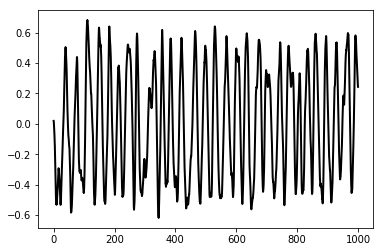

In [45]:
plt.plot(hopfModel.t, hopfModel.x.T, c='k', lw = 2)

# Brain network

In [48]:
from neurolib.utils.loadData import Dataset

ds = Dataset("gw")

In [49]:
hopfModel = hopf.HopfModel(Cmat = ds.Cmat, Dmat = ds.Dmat, simulateChunkwise=False)

In [54]:
hopfModel.params['w'] = 1.0
hopfModel.params['signalV'] = 0
hopfModel.params['duration'] = 10 * 1000 
hopfModel.params['sigma_ou'] = 0.14
hopfModel.params['K_gl'] = 0.6

hopfModel.run()

Text(0.5, 0, 't [ms]')

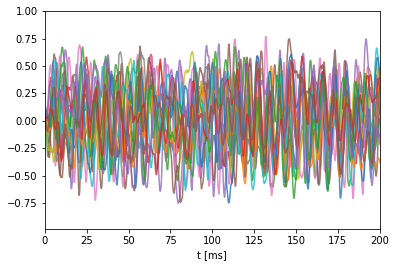

In [55]:
plt.plot(hopfModel.t, hopfModel.x[::5, :].T, alpha=0.8);
plt.xlim(0, 200)
plt.xlabel("t [ms]")

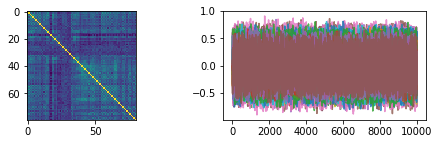

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(8, 2))
axs[0].imshow(func.fc(hopfModel.x[:, -10000:]))
axs[1].plot(hopfModel.t, hopfModel.x[::5, :].T, alpha=0.8);

In [57]:
scores = []
for i in range(len(FCs)):
    fc_score = func.matrix_correlation(func.fc(hopfModel.x[:, -int(5000/hopfModel.params['dt']):]), FCs[i])
    scores.append(fc_score)
    print("Subject {}: {:.2f}". format(i, fc_score))
print("Mean FC/FC correlation: {:.2f}".format(np.mean(scores)))

Subject 0: 0.52
Subject 1: 0.58
Subject 2: 0.53
Subject 3: 0.54
Subject 4: 0.63
Subject 5: 0.70
Subject 6: 0.40
Subject 7: 0.55
Subject 8: 0.65
Subject 9: 0.53
Subject 10: 0.68
Mean FC/FC correlation: 0.57
